In [1]:
pip install lifelines

     |████████████████████████████████| 347 kB 1.3 MB/s 
     |████████████████████████████████| 55 kB 1.8 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4034 sha256=303a27c243ed6ce803349a418f18cf5d4bf73aa06eb4f25899cdcc013bed7f08
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from lifelines import KaplanMeierFitter

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
###
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report,accuracy_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


# The Dataset

In [3]:
df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
g_H = df.loc[df['ejection_fraction'] > 55]
b_H = df.loc[df['ejection_fraction'] < 55]
f_d = df.loc[df['sex'] == 0]
m_d = df.loc[df['sex'] == 1]

cnd_d = df.loc[df['diabetes'] == 0]
cd_d = df.loc[df['diabetes'] == 1]

ns_d = df.loc[df['smoking'] == 0]
s_d = df.loc[df['smoking'] == 1]

cnbp_d = df.loc[df['high_blood_pressure'] == 1]
cbp_d = df.loc[df['high_blood_pressure'] == 0]

# Exploratory Data Analysis

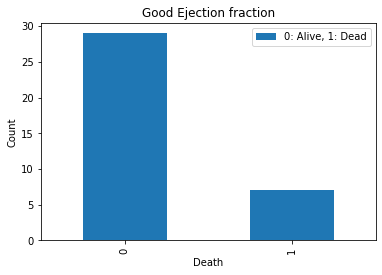

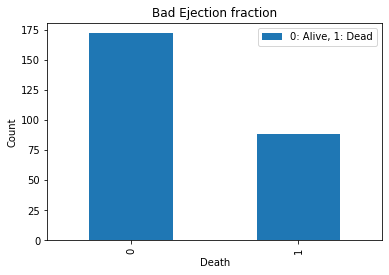

In [7]:
g_H['DEATH_EVENT'].value_counts().plot(kind = 'bar', title = 'Good Ejection fraction', xlabel = 'Death', legend = 'Death_event')
plt.ylabel('Count')
plt.legend({'0: Alive, 1: Dead'})
plt.show()
b_H['DEATH_EVENT'].value_counts().plot(kind = 'bar', title = 'Bad Ejection fraction', xlabel = 'Death')
plt.ylabel('Count')
plt.legend({'0: Alive, 1: Dead'})
plt.show()

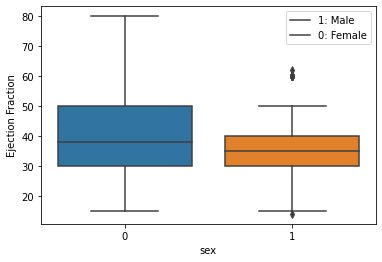

In [8]:
sns.boxplot(x = 'sex', y ='ejection_fraction', data = df)
plt.legend({'0: Female', '1: Male'})
plt.ylabel("Ejection Fraction")
plt.show()

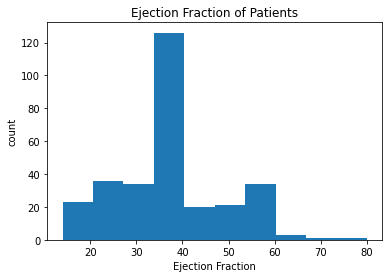

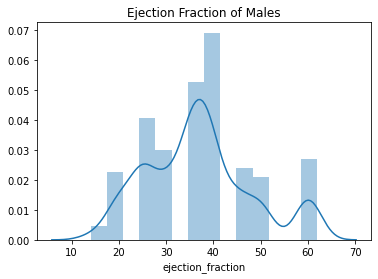

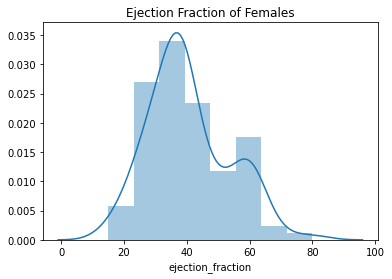

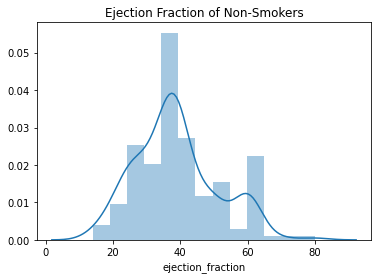

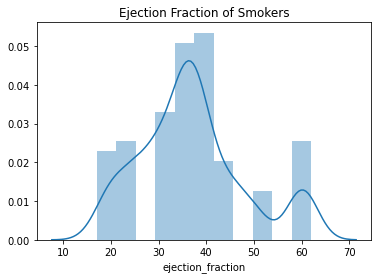

In [9]:
plt.hist(df.ejection_fraction)
plt.title('Ejection Fraction of Patients')
plt.xlabel('Ejection Fraction')
plt.ylabel('count')
plt.show()

sns.distplot(m_d.ejection_fraction)
plt.title('Ejection Fraction of Males')
plt.show()
sns.distplot(f_d.ejection_fraction)
plt.title('Ejection Fraction of Females')
plt.show()
sns.distplot(ns_d.ejection_fraction)
plt.title('Ejection Fraction of Non-Smokers')
plt.show()
sns.distplot(s_d.ejection_fraction)
plt.title('Ejection Fraction of Smokers')
plt.show()

**Null Hypothesis** - There is no difference in Ejection Fraction between Genders. 

**Alternative Hypothesis** - There is a difference in Ejection Fraction between Genders. 

In [10]:
import scipy.stats as ss 
t_stat, p_val= ss.ttest_ind(m_d.ejection_fraction,f_d.ejection_fraction)
print('P-Value of ejection between Genders - ', p_val)

P-Value of ejection between Genders -  0.010189690578840916


With a P-Value less than .05 we can **reject** the **Null Hypothesis** and **accept** the **Alternative Hypothesis** that there is a difference in EF between Genders.

# Survial Analysis

In [11]:
kmf = KaplanMeierFitter()
kmf_g = KaplanMeierFitter()
kmf_ba = KaplanMeierFitter()
kmf_f = KaplanMeierFitter()
kmf_m = KaplanMeierFitter()

kmf_nd = KaplanMeierFitter()
kmf_d = KaplanMeierFitter()
kmf_nb = KaplanMeierFitter()
kmf_b = KaplanMeierFitter()

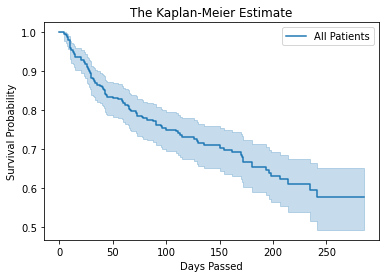

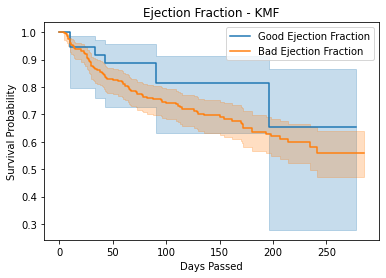

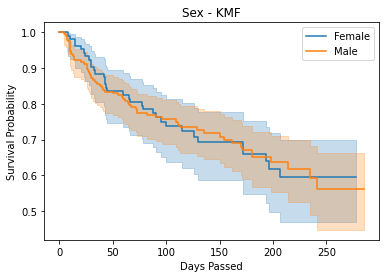

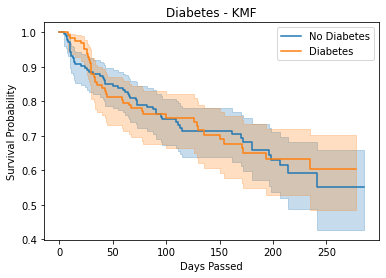

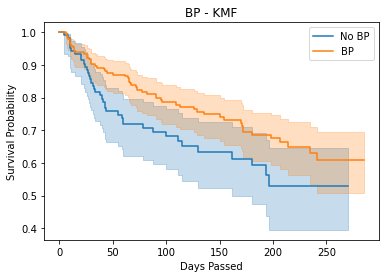

In [12]:
kmf.fit(df['time'], df['DEATH_EVENT'], label= 'All Patients')
kmf.plot()
plt.title("The Kaplan-Meier Estimate")
plt.xlabel("Days Passed")
plt.ylabel("Survival Probability")
plt.show()

kmf_g.fit(g_H['time'], g_H['DEATH_EVENT'], label = 'Good Ejection Fraction')
kmf_ba.fit(b_H['time'], b_H['DEATH_EVENT'], label = 'Bad Ejection Fraction')
kmf_g.plot()
kmf_ba.plot()
plt.title("Ejection Fraction - KMF")
plt.xlabel("Days Passed")
plt.ylabel("Survival Probability")
plt.show()

kmf_g.fit(f_d['time'], f_d['DEATH_EVENT'], label = 'Female')
kmf_b.fit(m_d['time'], m_d['DEATH_EVENT'], label = 'Male')
kmf_g.plot()
kmf_b.plot()
plt.title("Sex - KMF")
plt.xlabel("Days Passed")
plt.ylabel("Survival Probability")
plt.show()


kmf_nd.fit(cnd_d['time'],cnd_d['DEATH_EVENT'], label = 'No Diabetes')
kmf_d.fit(cd_d['time'], cd_d['DEATH_EVENT'], label = 'Diabetes')
kmf_nd.plot()
kmf_d.plot()
plt.title("Diabetes - KMF")
plt.xlabel("Days Passed")
plt.ylabel("Survival Probability")
plt.show()

kmf_nb.fit(cnbp_d['time'], cnbp_d['DEATH_EVENT'], label = 'No BP')
kmf_b.fit(cbp_d['time'], cbp_d['DEATH_EVENT'], label = 'BP')
kmf_nb.plot()
kmf_b.plot()
plt.title("BP - KMF")
plt.xlabel("Days Passed")
plt.ylabel("Survival Probability")
plt.show()

# Models

In [13]:
df2 = df
y = df2['DEATH_EVENT'].values
X = df2.drop('DEATH_EVENT', axis= 1).values


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify= y)

# Supervised Models

[[37  4]
 [17  2]]
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        41
           1       0.33      0.11      0.16        19

    accuracy                           0.65        60
   macro avg       0.51      0.50      0.47        60
weighted avg       0.57      0.65      0.58        60

ROC AUC score: 0.50


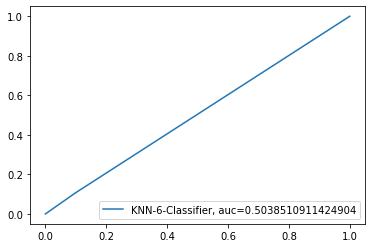

In [14]:
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Evaluate test-set roc_auc_score
KNN_6_Classifier_roc = roc_auc_score(y_test, y_pred)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(KNN_6_Classifier_roc))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc2 = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="KNN-6-Classifier, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

[[35  6]
 [ 7 12]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.67      0.63      0.65        19

    accuracy                           0.78        60
   macro avg       0.75      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60

ROC AUC score: 0.74


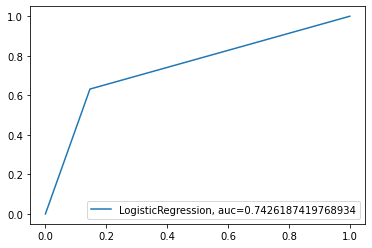

In [15]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

LogReg_ROC = roc_auc_score(y_test, y_pred)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(LogReg_ROC))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc2 = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

In [16]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid=param_grid, cv = 5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']})

Tuned Logistic Regression Parameter: {'C': 0.0007196856730011522, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.8657142857142857
ROC AUC score: 0.75


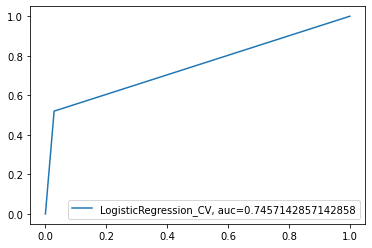

In [17]:
y_pred = logreg_cv.predict(X_test)
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

LogReg_CV = roc_auc_score(y_test, y_pred)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(LogReg_CV))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr,label="LogisticRegression_CV, auc="+str(LogReg_CV))
plt.legend(loc=4)
plt.show()

Accuracy with Scaling: 0.7888888888888889
Accuracy without Scaling: 0.5555555555555556
ROC AUC score: 0.76


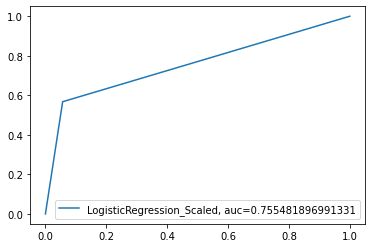

In [18]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = knn_scaled.predict(X_test)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

LogReg_Scaled = roc_auc_score(y_test, y_pred)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(LogReg_Scaled))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr,label="LogisticRegression_Scaled, auc="+str(LogReg_Scaled))
plt.legend(loc=4)
plt.show()

ROC AUC score: 0.84


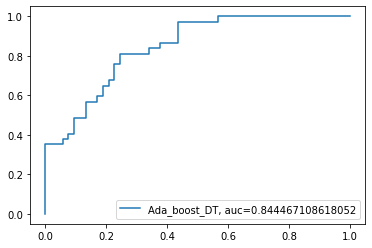

In [19]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada_dt = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

# Fit ada to the training set
ada_dt.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_prob_dt = ada_dt.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
ada_dt_roc_auc = roc_auc_score(y_test, y_pred_prob_dt)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_dt_roc_auc))

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob_dt)
auc1 = roc_auc_score(y_test, y_pred_prob_dt)
plt.plot(fpr,tpr,label="Ada_boost_DT, auc="+str(auc1))
plt.legend(loc=4)
plt.show()

ROC AUC score: 0.84


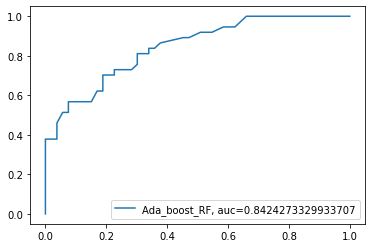

In [20]:
rfc = RandomForestClassifier()
# Instantiate ada
ada_rf = AdaBoostClassifier(base_estimator=rfc, n_estimators=180, random_state=1)

# Fit ada to the training set
ada_rf.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_prob_rf = ada_rf.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
ada_rf_roc_auc = roc_auc_score(y_test, y_pred_prob_rf)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_rf_roc_auc))

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob_rf)
auc2 = roc_auc_score(y_test, y_pred_prob_rf)
plt.plot(fpr,tpr,label="Ada_boost_RF, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

# Unsupervised Models

Test set accuracy: 0.72
ROC AUC score: 0.69


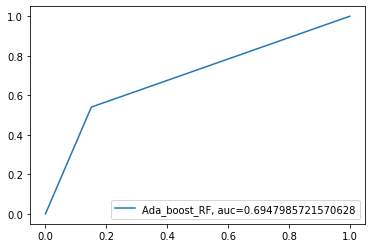

In [21]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=3)

# Fit dt to the training set

dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

# Evaluate test-set roc_auc_score
DT_AUC = roc_auc_score(y_test, y_pred)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(DT_AUC))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr,label="Ada_boost_RF, auc="+str(DT_AUC))
plt.legend(loc=4)
plt.show()

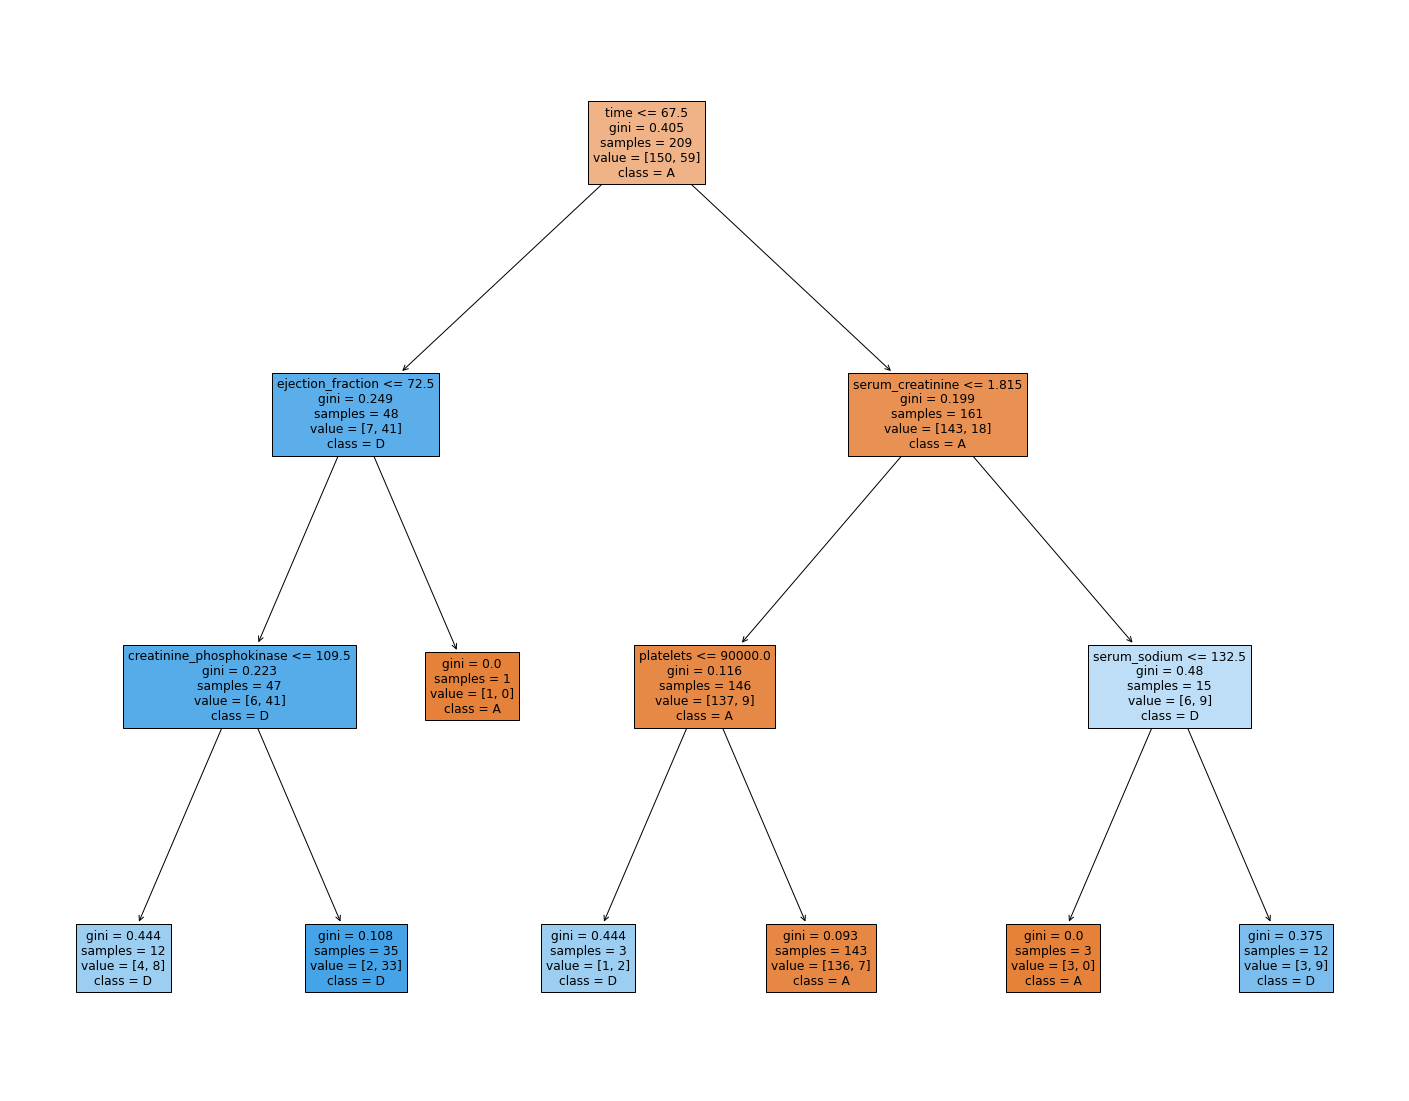

In [22]:
from sklearn import tree
df2 = df
y = df2['DEATH_EVENT']
X = df2.drop('DEATH_EVENT', axis= 1)
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(dt, 
                   feature_names=X.columns,  
                   class_names='AD',
                   filled=True)

**As Many know a low EF is a potential factor for a Cardiac Event. Looking at the DT above, we see Serum_Creatinine & platelets levels are another possible factor.**